In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

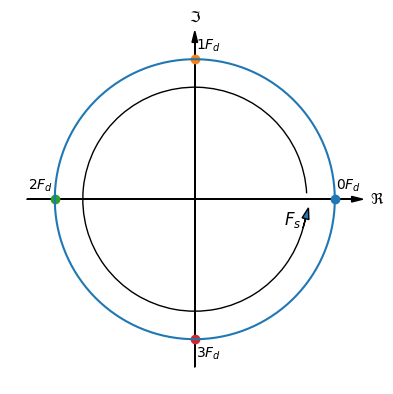

In [97]:
# Plot over hvordan DFT algoritmen sampler
theta = np.linspace(0,2*np.pi,400)
x = np.cos(theta)
y = np.sin(theta)

plt.figure()
plt.plot(x,y)

axis_len = 1.2
plt.arrow(-axis_len, 0, 2*axis_len, 0, 
          length_includes_head=True, head_width=0.04, head_length=0.08,color='black')   # Real-akse (x)
plt.arrow(0, -axis_len, 0, 2*axis_len, 
          length_includes_head=True, head_width=0.04, head_length=0.08,color='black')   # Imag-akse (y)

plt.gca().set_aspect('equal',adjustable='box')

adjustment = 0.1 # Til at flytte teksten lidt væk fra punkterne
points = {
    r"$0F_d$": (1, 0, adjustment, adjustment),     
    r"$1F_d$": (0, 1, adjustment, adjustment),      
    r"$2F_d$": (-1, 0, -adjustment, adjustment),    
    r"$3F_d$": (0, -1, adjustment, -adjustment)     
}

for label, (px, py, dx, dy) in points.items():
    plt.scatter(px, py)
    plt.text(px+dx, py+dy, label, ha='center', va='center')

# Indre cirkel med pil (Fs)
r_inner = 0.8
arc = Arc((0,0), 2*r_inner, 2*r_inner, angle=0, theta1=3, theta2=345)
plt.gca().add_patch(arc)

angle = np.deg2rad(345)
x_end = r_inner * np.cos(angle)
y_end = r_inner * np.sin(angle)

dx = -0.15*np.sin(angle)
dy =  0.15*np.cos(angle)
plt.arrow(x_end, y_end, dx, dy,
          length_includes_head=True, head_width=0.05, head_length=0.08)
plt.text(r_inner-0.1, -0.15, r"$F_s$", ha='center', va='center', fontsize=12)

# Tekst på akserne 
plt.text(axis_len+0.1, 0, r"$\Re$", ha='center', va='center', fontsize=11)
plt.text(0, axis_len+0.1, r"$\Im$", ha='center', va='center', fontsize=11)
plt.axis('off')
plt.show()

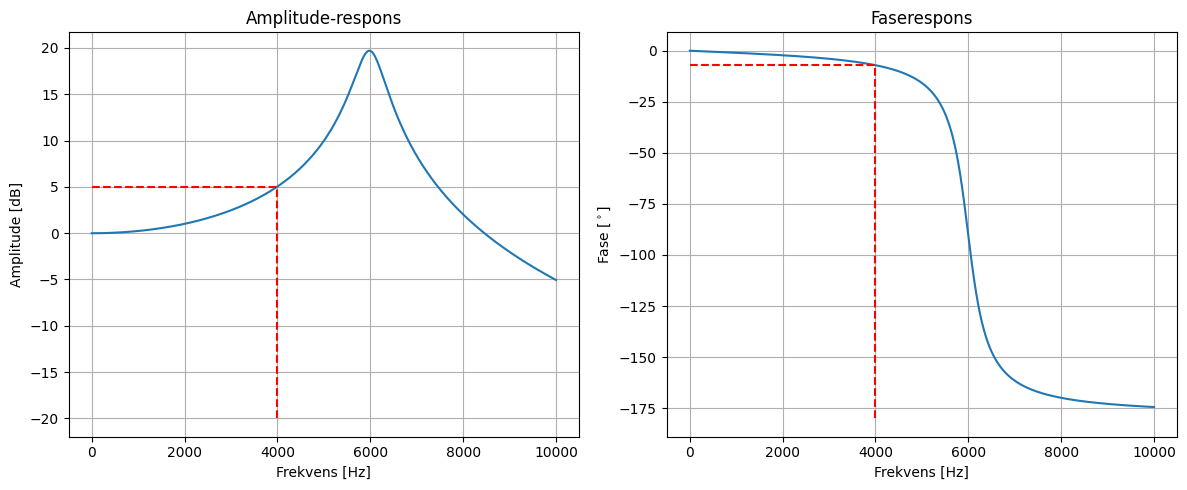

In [ ]:
# Plot over RX-filteret
# Komponentværdier
L = 11.75e-3 # Målt værdi af RX spole
R1 = 41.9 # Målt ohmsk modstand i RX spole
C = 60e-9 # Kondensator til filter
R2 = 50e3 # Inputimpedans til operationsforstærkerkredsløb
# Frekvensområde
f = np.linspace(1, 10e3, 5000)
w = 2*np.pi*f
# Impedanser
ZL = 1j*w*L
ZC = 1/(1j*w*C)
Zout = (R2*ZC)/(R2 + ZC)
Zserie = R1 + ZL
# Overføringsfunktion
H = Zout / (Zserie + Zout)
# Amplitude og fase
mag = np.abs(H)
phase = np.angle(H, deg=True)
#Aflæsning af grafer
def phase_read(freq):
    idx = np.argmin(np.abs(f-freq))
    return phase[idx]
def mag_read(freq):
    idx = np.argmin(np.abs(f-freq))
    return 20*np.log10(mag[idx])
# Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Amplitude-plot
ax1.plot(f, 20*np.log10(mag))
ax1.set_xlabel("Frekvens [Hz]")
ax1.set_ylabel("Amplitude [dB]")
ax1.set_title("Amplitude-respons")
ax1.plot([0,4e3],[mag_read(4e3),mag_read(4e3)],color='red',linestyle='--')
ax1.plot([4e3,4e3],[-20,mag_read(4e3)],color='red',linestyle='--')
ax1.grid(True)
# Fase-plot
ax2.plot(f, phase)
ax2.set_xlabel("Frekvens [Hz]")
ax2.set_ylabel(r"Fase [$^\circ$]")
ax2.set_title("Faserespons")
ax2.plot([0,4e3],[phase_read(4e3),phase_read(4e3)],color='red',linestyle='--')
ax2.plot([4e3,4e3],[-180,phase_read(4e3)],color='red',linestyle='--')
ax2.grid(True)
plt.tight_layout()
plt.show()